Copyright **`(c)`** 2024 Federico Spinoso `<s324617@studenti.polito.it>`  
[`https://github.com/fedspi00/CI2024_lab2`](https://github.com/fedspi00/CI2024_lab2)  

In [36]:
import logging
from itertools import combinations
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
import folium
import matplotlib.pyplot as plt

from icecream import ic

logging.basicConfig(level=logging.DEBUG)

In [37]:
def readCSV(path):
    CITIES = pd.read_csv(path, header=None, names=['name', 'lat', 'lon'])
    DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))
    for c1, c2 in combinations(CITIES.itertuples(), 2):
        DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
            (c1.lat, c1.lon), (c2.lat, c2.lon)
        ).km
    
    return CITIES, DIST_MATRIX

In [38]:
def tsp_cost(tsp, CITIES, DIST_MATRIX):
    assert tsp[0] == tsp[-1]
    assert set(tsp) == set(range(len(CITIES)))

    tot_cost = 0
    for c1, c2 in zip(tsp, tsp[1:]):
        tot_cost += DIST_MATRIX[c1, c2]
    return tot_cost


In [39]:
def generate_map(tsp, CITIES, path):
    tsp_path = CITIES.iloc[tsp]

    map_center = [tsp_path['lat'].mean(), tsp_path['lon'].mean()]
    map = folium.Map(location=map_center, zoom_start=6)

    for idx, row in tsp_path.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=row['name'],
            tooltip=row['name']
        ).add_to(map)

    coordinates = [(row['lat'], row['lon']) for idx, row in tsp_path.iterrows()]
    folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(map)

    nameFile = path.split("/")[1].split(".")[0]
    map.save("plots/" + nameFile + ".html")

In [40]:
def plot_map(tsp, CITIES):
    cities = CITIES.loc[tsp]
    latitudes = cities['lat'].values
    longitudes = cities['lon'].values
    city_names = cities['name'].values

    plt.figure(figsize=(14, 12))

    plt.plot(longitudes, latitudes, linestyle='-', color='#1E90FF', linewidth=2)
    plt.scatter(longitudes, latitudes, color='#00008B', s=50)
    #plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='b')

    for i, city in enumerate(city_names):
        plt.text(longitudes[i], latitudes[i], city, fontsize=10, ha='right')

    plt.title('TSP')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

In [ ]:
def greedy_algorithm(CITIES, DIST_MATRIX):    
    visited = np.full(len(CITIES), False)
    dist = DIST_MATRIX.copy()
    city = 0
    visited[city] = True
    tsp = list()
    tsp.append(int(city))
    while not np.all(visited):
        dist[:, city] = np.inf
        closest = np.argmin(dist[city])
        print(
            f"step: {CITIES.at[city,'name']} -> {CITIES.at[closest,'name']} ({DIST_MATRIX[city,closest]:.2f}km)"
        )
        visited[closest] = True
        city = closest
        tsp.append(int(city))
    print(
        f"step: {CITIES.at[tsp[-1],'name']} -> {CITIES.at[tsp[0],'name']} ({DIST_MATRIX[tsp[-1],tsp[0]]:.2f}km)"
    )
    tsp.append(tsp[0])


    print(f"result: Found a path of {len(tsp)-1} steps, total length {tsp_cost(tsp, CITIES, DIST_MATRIX):.2f}km")
    
    return tsp

DEBUG:root:step: Acheng -> Harbin (33.60km)
DEBUG:root:step: Harbin -> Shuangcheng (53.02km)
DEBUG:root:step: Shuangcheng -> Yushu (61.85km)
DEBUG:root:step: Yushu -> Wuchang (47.68km)
DEBUG:root:step: Wuchang -> Shulan (59.07km)
DEBUG:root:step: Shulan -> Jishu (17.91km)
DEBUG:root:step: Jishu -> Jilin city (50.81km)
DEBUG:root:step: Jilin city -> Jiutai (65.06km)
DEBUG:root:step: Jiutai -> Dehui (43.68km)
DEBUG:root:step: Dehui -> Changchun (78.49km)
DEBUG:root:step: Changchun -> Gongzhuling (59.12km)
DEBUG:root:step: Gongzhuling -> Siping (54.24km)
DEBUG:root:step: Siping -> Liaoyuan (71.76km)
DEBUG:root:step: Liaoyuan -> Meihekou (60.38km)
DEBUG:root:step: Meihekou -> Panshi (55.16km)
DEBUG:root:step: Panshi -> Huadian (56.40km)
DEBUG:root:step: Huadian -> Jiaohe (96.49km)
DEBUG:root:step: Jiaohe -> Dunhua (82.15km)
DEBUG:root:step: Dunhua -> Helong (110.22km)
DEBUG:root:step: Helong -> Longjing (42.88km)
DEBUG:root:step: Longjing -> Yanji (14.70km)
DEBUG:root:step: Yanji -> Tumen 

result: Found a path of 726 steps, total length 63962.92km


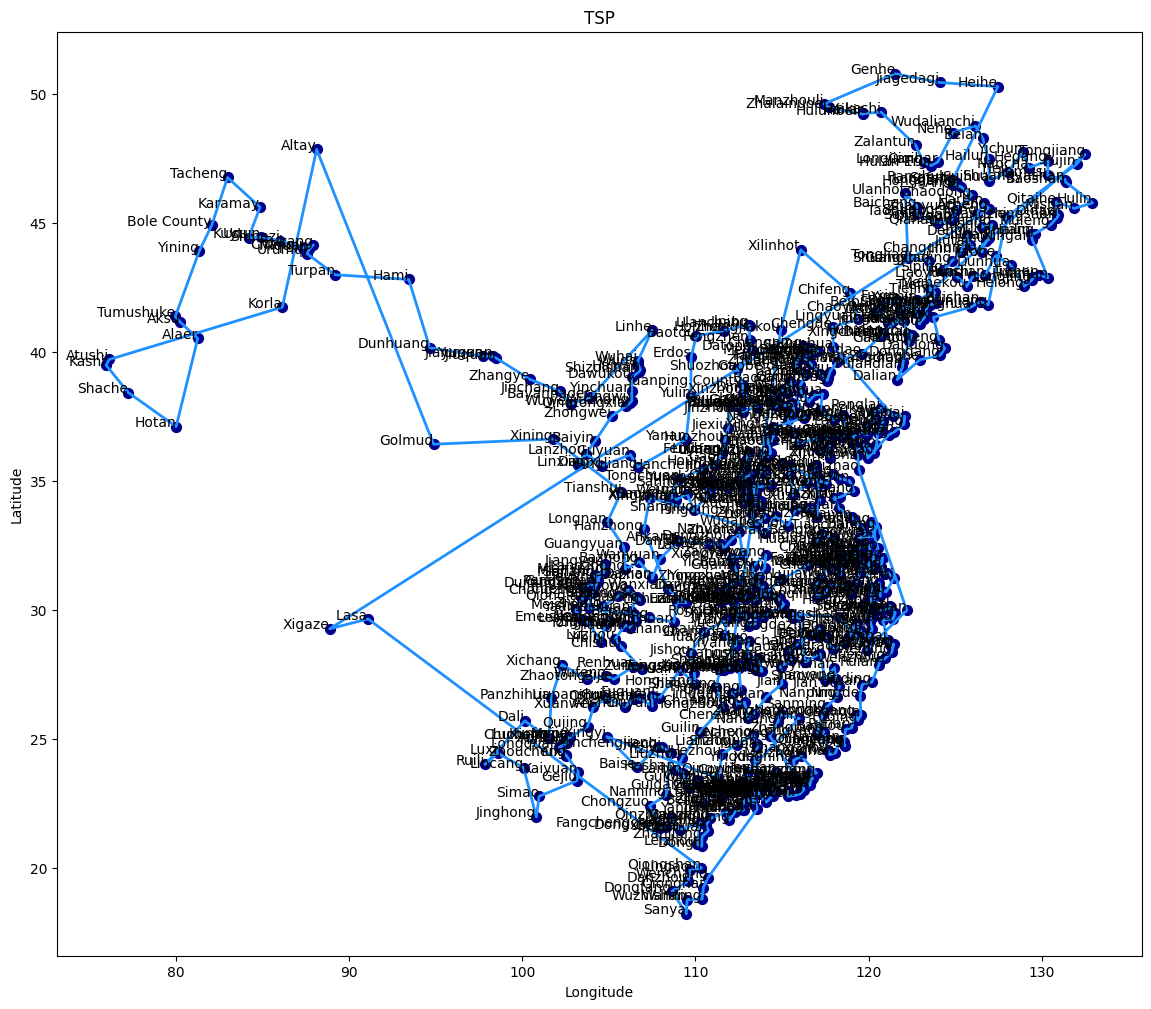

DEBUG:root:step: Abakan -> Krasnoyarsk (276.58km)
DEBUG:root:step: Krasnoyarsk -> Achinsk (161.71km)
DEBUG:root:step: Achinsk -> Kemerovo (296.59km)
DEBUG:root:step: Kemerovo -> Leninsk‐Kuznetskiy (74.76km)
DEBUG:root:step: Leninsk‐Kuznetskiy -> Prokopyevsk (91.87km)
DEBUG:root:step: Prokopyevsk -> Novokuznetsk (30.63km)
DEBUG:root:step: Novokuznetsk -> Biysk (187.38km)
DEBUG:root:step: Biysk -> Barnaul (132.82km)
DEBUG:root:step: Barnaul -> Novosibirsk (194.50km)
DEBUG:root:step: Novosibirsk -> Tomsk (206.90km)
DEBUG:root:step: Tomsk -> Seversk (14.97km)
DEBUG:root:step: Seversk -> Rubtsovsk (613.13km)
DEBUG:root:step: Rubtsovsk -> Omsk (647.47km)
DEBUG:root:step: Omsk -> Tobolsk (475.40km)
DEBUG:root:step: Tobolsk -> Tyumen (200.98km)
DEBUG:root:step: Tyumen -> Kurgan (189.69km)
DEBUG:root:step: Kurgan -> Kopeysk (236.87km)
DEBUG:root:step: Kopeysk -> Chelyabinsk (14.72km)
DEBUG:root:step: Chelyabinsk -> Miass (87.20km)
DEBUG:root:step: Miass -> Zlatoust (33.88km)
DEBUG:root:step: Zl

result: Found a path of 167 steps, total length 42334.16km


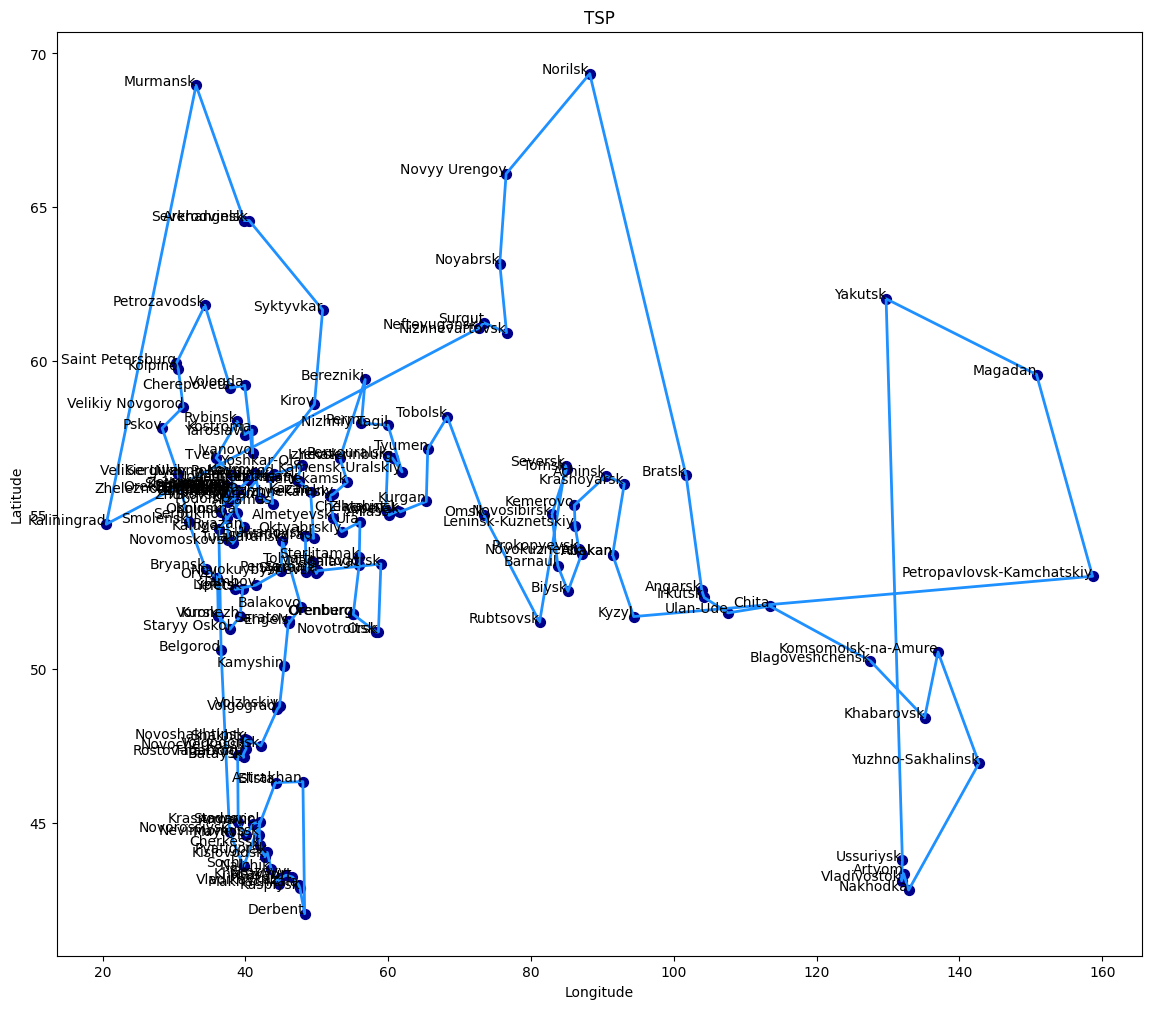

DEBUG:root:step: Abilene -> Wichita Falls (196.78km)
DEBUG:root:step: Wichita Falls -> Denton (149.68km)
DEBUG:root:step: Denton -> Lewisville (23.92km)
DEBUG:root:step: Lewisville -> Carrollton (10.02km)
DEBUG:root:step: Carrollton -> Plano (15.78km)
DEBUG:root:step: Plano -> Allen (9.27km)
DEBUG:root:step: Allen -> McKinney (10.45km)
DEBUG:root:step: McKinney -> Frisco (15.17km)
DEBUG:root:step: Frisco -> Richardson (22.38km)
DEBUG:root:step: Richardson -> Garland (10.04km)
DEBUG:root:step: Garland -> Mesquite (16.57km)
DEBUG:root:step: Mesquite -> Dallas (16.56km)
DEBUG:root:step: Dallas -> Irving (20.41km)
DEBUG:root:step: Irving -> Grand Prairie (19.83km)
DEBUG:root:step: Grand Prairie -> Fort Worth (32.28km)
DEBUG:root:step: Fort Worth -> Waco (136.07km)
DEBUG:root:step: Waco -> Killeen (74.58km)
DEBUG:root:step: Killeen -> Round Rock (61.72km)
DEBUG:root:step: Round Rock -> Austin (25.47km)
DEBUG:root:step: Austin -> San Antonio (118.67km)
DEBUG:root:step: San Antonio -> Corpus 

result: Found a path of 326 steps, total length 48050.03km


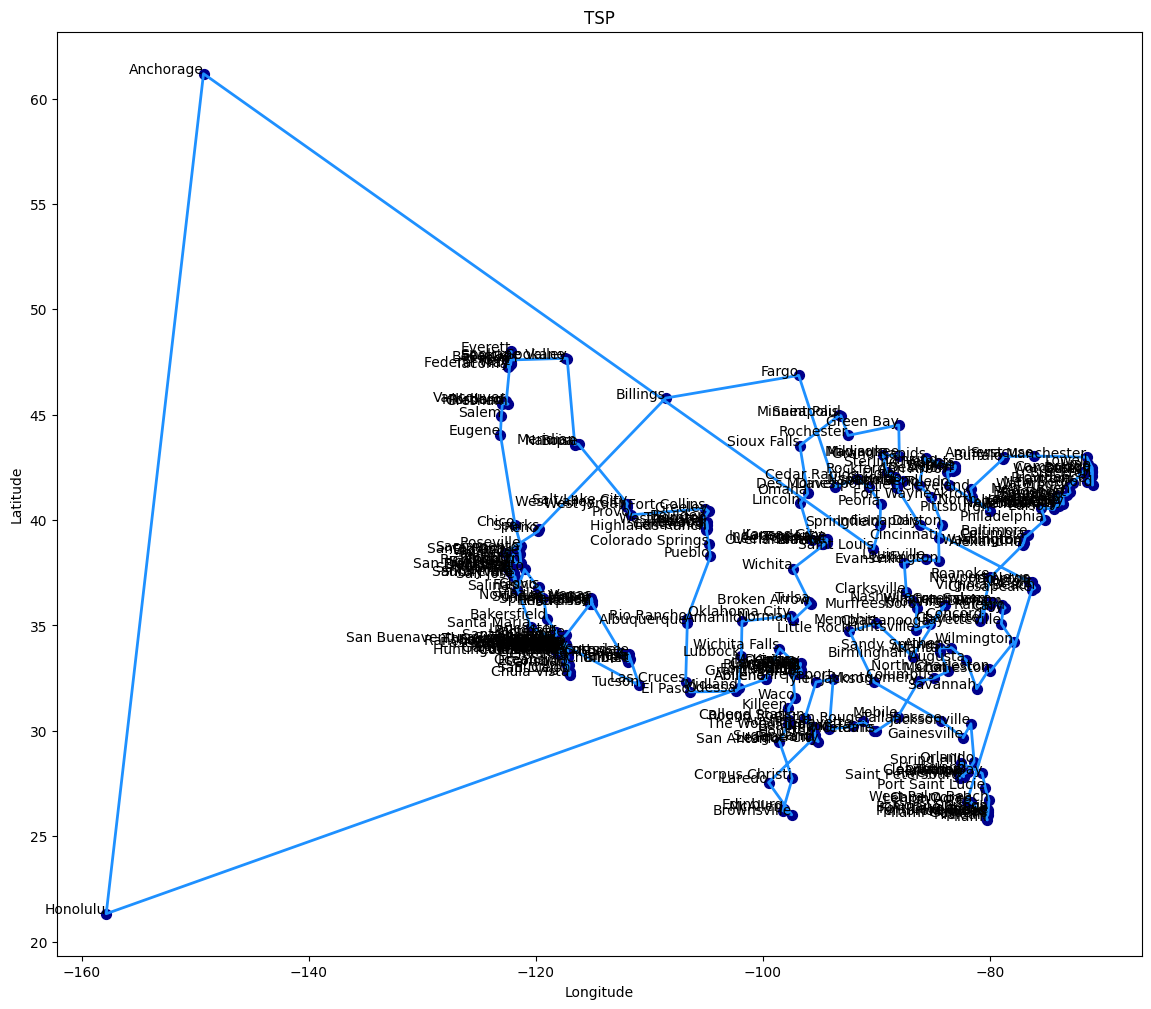

DEBUG:root:step: Ancona -> Rimini (90.60km)
DEBUG:root:step: Rimini -> Forlì (46.72km)
DEBUG:root:step: Forlì -> Ravenna (26.46km)
DEBUG:root:step: Ravenna -> Ferrara (66.67km)
DEBUG:root:step: Ferrara -> Bologna (43.43km)
DEBUG:root:step: Bologna -> Modena (37.29km)
DEBUG:root:step: Modena -> Reggio nell'Emilia (23.94km)
DEBUG:root:step: Reggio nell'Emilia -> Parma (26.94km)
DEBUG:root:step: Parma -> Piacenza (57.65km)
DEBUG:root:step: Piacenza -> Milan (60.65km)
DEBUG:root:step: Milan -> Monza (14.51km)
DEBUG:root:step: Monza -> Bergamo (33.92km)
DEBUG:root:step: Bergamo -> Brescia (46.02km)
DEBUG:root:step: Brescia -> Verona (61.42km)
DEBUG:root:step: Verona -> Vicenza (44.70km)
DEBUG:root:step: Vicenza -> Padua (30.13km)
DEBUG:root:step: Padua -> Venice (36.07km)
DEBUG:root:step: Venice -> Trieste (115.09km)
DEBUG:root:step: Trieste -> Bolzano (209.68km)
DEBUG:root:step: Bolzano -> Trento (49.94km)
DEBUG:root:step: Trento -> Novara (206.69km)
DEBUG:root:step: Novara -> Turin (84.46

result: Found a path of 46 steps, total length 4436.03km


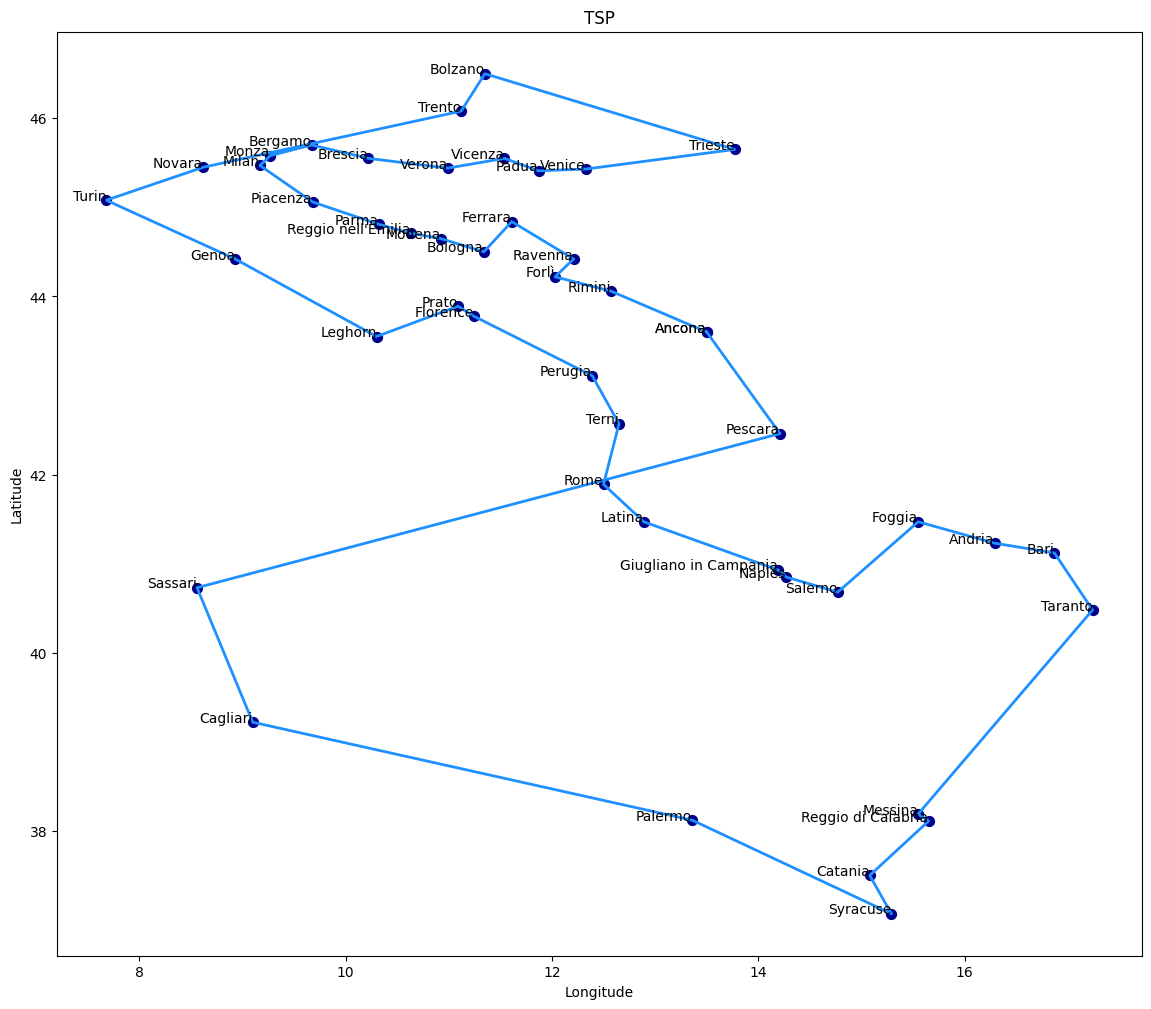

DEBUG:root:step: Isangel -> Vila (223.00km)
DEBUG:root:step: Vila -> Lakatoro (206.74km)
DEBUG:root:step: Lakatoro -> Norsup (2.46km)
DEBUG:root:step: Norsup -> Luganville (67.09km)
DEBUG:root:step: Luganville -> Port Olry (52.02km)
DEBUG:root:step: Port Olry -> Longana (105.77km)
DEBUG:root:step: Longana -> Sola (165.49km)
DEBUG:root:step: Sola -> Isangel (652.96km)


result: Found a path of 8 steps, total length 1475.53km


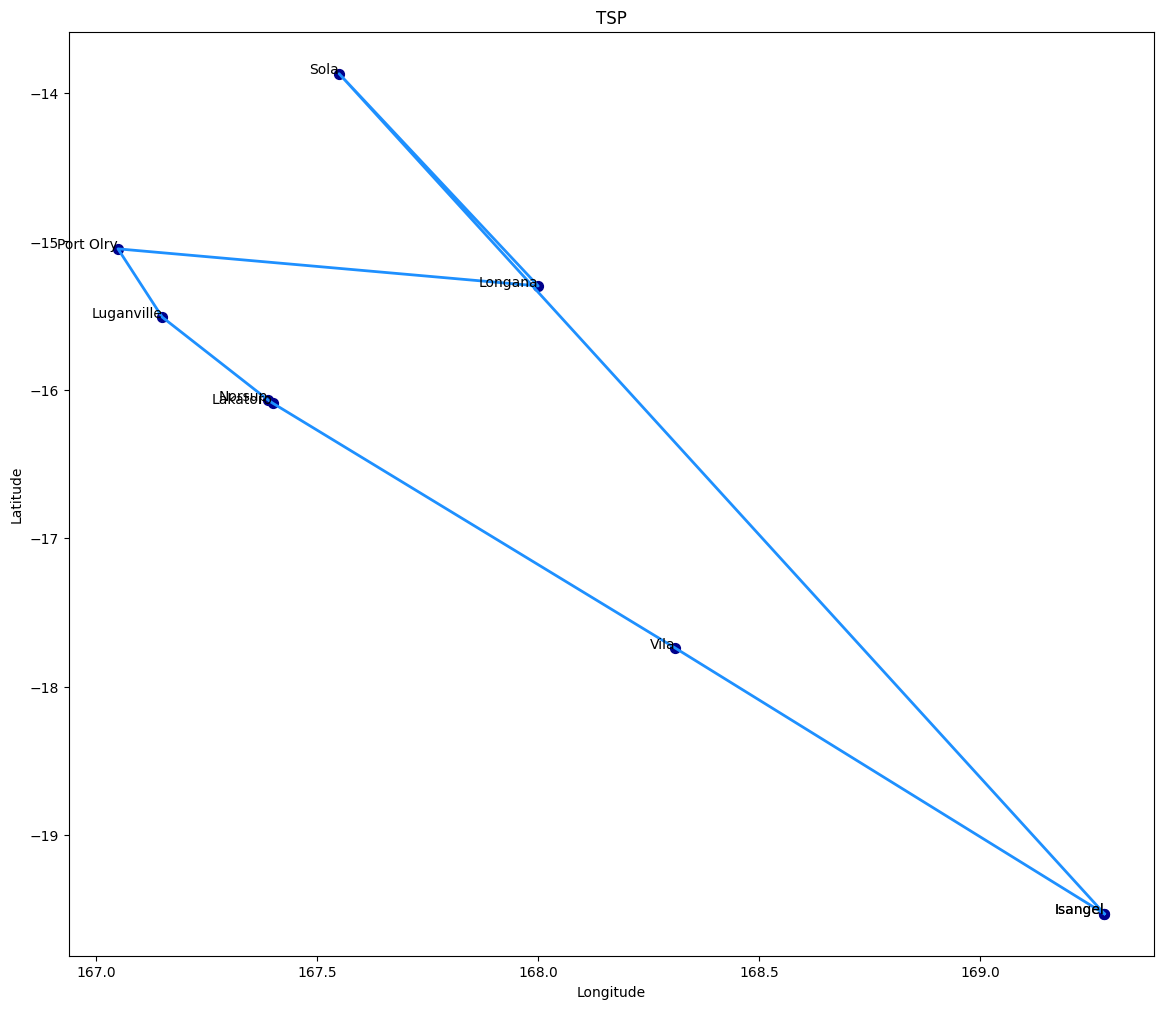

In [42]:
CITIES_LIST = {'cities/china.csv', 'cities/italy.csv', 'cities/russia.csv', 'cities/us.csv', 'cities/vanuatu.csv'}
for path in CITIES_LIST:
    CITIES, DIST_MATRIX = readCSV(path)
    tsp = greedy_algorithm(CITIES, DIST_MATRIX)
    generate_map(tsp, CITIES, path)
    plot_map(tsp, CITIES)